### Multi-Layer Perceptron

---

In [1]:
import random

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random.seed(42)

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
# Build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [5]:
block_size = 3  # Context length: How many characters do we take to predict the next one.

X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix], Y)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e [5]
..e ---> m [5, 13]
.em ---> m [5, 13, 13]
emm ---> a [5, 13, 13, 1]
mma ---> . [5, 13, 13, 1, 0]
olivia
... ---> o [5, 13, 13, 1, 0, 15]
..o ---> l [5, 13, 13, 1, 0, 15, 12]
.ol ---> i [5, 13, 13, 1, 0, 15, 12, 9]
oli ---> v [5, 13, 13, 1, 0, 15, 12, 9, 22]
liv ---> i [5, 13, 13, 1, 0, 15, 12, 9, 22, 9]
ivi ---> a [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1]
via ---> . [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0]
ava
... ---> a [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1]
..a ---> v [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22]
.av ---> a [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1]
ava ---> . [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0]
isabella
... ---> i [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9]
..i ---> s [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9, 19]
.is ---> a [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9, 19, 1]
isa ---> b [5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9, 19, 1, 2]
sab ---> e [5, 13

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

<img src="https://miro.medium.com/max/2400/1*EqKiy4-6tuLSoPP_kub33Q.png" width="800">

In [7]:
C = torch.randn((27, 2))        # C = Lookup table | Each of the 27 characters has a two dimensional space - paper uses 30, 60 and 100 for 17k words
# C[[5, 6, 7]]

In [8]:
emb = C[X]
emb.shape       # 32 = Number of input examples | 3 = Block Size (Input size of neural network) | 2 = Embedding Space

torch.Size([32, 3, 2])

In [9]:
W1 = torch.randn((6, 100))      # 6 = Inputs (3 inputs with 2 dimensions) | 100 = Number of neurons - hyperparameter variable
b1 = torch.randn(100)       # 100 bias - 1 for each neuron

In [10]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape      # Seperate the dimensions for each index of the 3 block size embedding

torch.Size([32, 6])

In [11]:
torch.cat(torch.unbind(emb, 1), 1).shape        # Same as above but works for N block size

torch.Size([32, 6])

In [12]:
emb.view(32, 6).shape       # Another (faster) approach. .view() only affects "storage" parameters instead of adding / editing memory.

torch.Size([32, 6])

In [13]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)       # Hidden layer
h

tensor([[-1.0000,  0.4358,  0.9964,  ...,  0.2066, -0.0851,  0.7033],
        [-0.7455, -0.7202, -0.8908,  ...,  0.8422, -0.9886,  0.9937],
        [-1.0000,  0.9972,  1.0000,  ..., -0.9985, -0.9594, -0.8115],
        ...,
        [-0.3565, -0.2223, -0.1393,  ...,  0.3537, -0.9680,  0.6585],
        [-0.7060,  0.3361, -0.4035,  ..., -0.9780, -0.9947, -0.7720],
        [-0.9954,  0.8072,  0.0487,  ..., -0.9955, -0.9761, -0.8811]])

In [14]:
W2 = torch.randn((100, 27))         # 100 = Input neurons | 27 = Output layer representing each character
b2 = torch.randn(27)

In [15]:
# Softmax final layer
logits = h @ W2 + b2        # Logits = output of neural network
counts = logits.exp()       # Exponentiate to get fake counts
prob = counts / counts.sum(1, keepdims=True)        # Normalize into a probability 


In [16]:
prob[0].sum(), prob.shape       # Every row of prob sums to one to confirm it is normalized

(tensor(1.), torch.Size([32, 27]))

In [17]:
# Labels
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [18]:
prob[torch.arange(32), Y]       # Extract the probablitiy assigned to the correct character

tensor([8.5572e-08, 9.0216e-11, 2.8848e-09, 3.2271e-06, 6.2274e-04, 1.8909e-02,
        6.5624e-05, 3.0652e-03, 3.3856e-01, 8.8009e-05, 3.4858e-08, 1.2850e-11,
        4.3675e-06, 5.4065e-04, 1.5781e-07, 5.2704e-04, 1.7863e-02, 5.2986e-01,
        3.6240e-12, 6.5769e-05, 2.1915e-10, 1.2958e-02, 1.0131e-03, 2.3456e-15,
        5.6190e-12, 2.9686e-04, 3.5699e-06, 1.5367e-06, 5.6761e-04, 1.8131e-04,
        6.0175e-11, 8.2613e-04])

In [19]:
loss = -prob[torch.arange(32), Y].log().mean()          # Average negative log likelihood
loss

tensor(12.7720)

In [20]:
F.cross_entropy(logits, Y)      # Optimized method of the above (average negative log likelihood)

tensor(12.7720)

In [21]:
torch.randint(0, 5, (32,))      # Generate minibatch of size 32 between 0 amd 5

tensor([3, 1, 4, 4, 1, 1, 4, 1, 4, 0, 4, 0, 1, 1, 2, 3, 0, 0, 2, 0, 2, 0, 3, 3,
        4, 3, 1, 3, 0, 4, 2, 2])

In [22]:
torch.linspace(-0.001, 1, 100)      # Generate learning rate between -0.001 and 1 over 100 steps

tensor([-0.0010,  0.0091,  0.0192,  0.0293,  0.0394,  0.0496,  0.0597,  0.0698,
         0.0799,  0.0900,  0.1001,  0.1102,  0.1203,  0.1304,  0.1406,  0.1507,
         0.1608,  0.1709,  0.1810,  0.1911,  0.2012,  0.2113,  0.2214,  0.2316,
         0.2417,  0.2518,  0.2619,  0.2720,  0.2821,  0.2922,  0.3023,  0.3124,
         0.3226,  0.3327,  0.3428,  0.3529,  0.3630,  0.3731,  0.3832,  0.3933,
         0.4034,  0.4136,  0.4237,  0.4338,  0.4439,  0.4540,  0.4641,  0.4742,
         0.4843,  0.4944,  0.5046,  0.5147,  0.5248,  0.5349,  0.5450,  0.5551,
         0.5652,  0.5753,  0.5854,  0.5956,  0.6057,  0.6158,  0.6259,  0.6360,
         0.6461,  0.6562,  0.6663,  0.6764,  0.6866,  0.6967,  0.7068,  0.7169,
         0.7270,  0.7371,  0.7472,  0.7573,  0.7674,  0.7776,  0.7877,  0.7978,
         0.8079,  0.8180,  0.8281,  0.8382,  0.8483,  0.8584,  0.8686,  0.8787,
         0.8888,  0.8989,  0.9090,  0.9191,  0.9292,  0.9393,  0.9494,  0.9596,
         0.9697,  0.9798,  0.9899,  1.00

In [23]:
lre = torch.linspace(-3, 0, 1000)       # Stepping linearly through the exponents of the learning rate
lrs = 10**lre       # 10 to the power of 0 is 1

In [24]:
# SUMMARY ---------------------------------->

In [25]:
# training split : dev / validation split : test split
# 80% : 10% : 10%

In [26]:
def build_dataset(words):
        block_size = 3      # Context length: How many characters do we take to predict the next one.

        X, Y = [], []
        for w in words:
            context = [0] * block_size
            for ch in w + '.':
                ix = stoi[ch]
                X.append(context)
                Y.append(ix)
                context = context[1:] + [ix]        # Crop and append

        X = torch.tensor(X)
        Y = torch.tensor(Y)
        print(X.shape, Y.shape)
        return X, Y

In [27]:
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [28]:
Xtr.shape, Ytr.shape        # Dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [29]:
# Model
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [30]:
sum(p.nelement() for p in parameters)       # Total number of parameters

11897

In [31]:
for p in parameters:
    p.requires_grad = True

In [32]:
# lri = []
stepi = []
lossi = []

In [33]:
for i in range(200000):

    # Minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))        # Batch size of 32 maching embedding shape [32, 3, 2] rather than [228146, 3, 2]
    
    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update
    # lr = lrs[i]
    # lr = 0.01        # Identify from metrics - Set to 0.01 after a few iterations to decay further
    lr = 0.1 if i < 100000 else 0.01

    for p in parameters:
        p.data += -lr * p.grad

    # # Metrics
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.1163787841796875


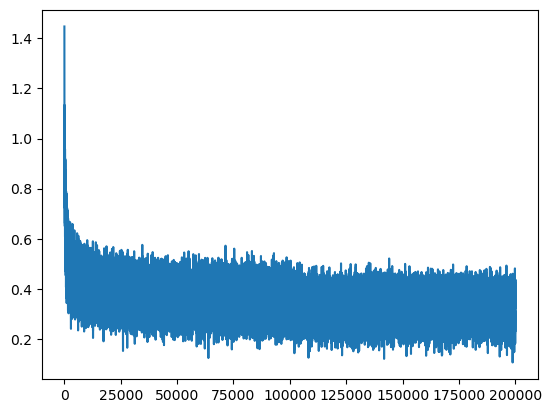

In [34]:
plt.plot(stepi, lossi)      # Use lri when identifing learning rate

In [35]:
# Validation test
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1773, grad_fn=<NllLossBackward0>)

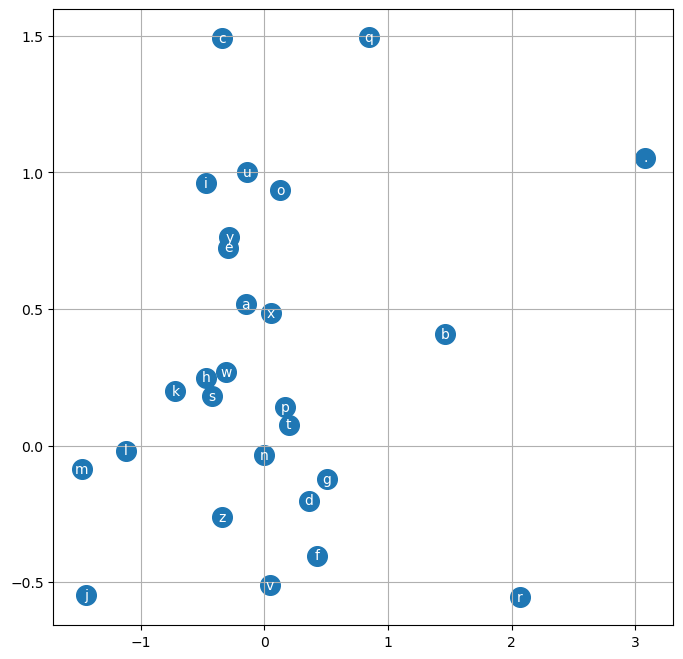

In [36]:
# Visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [38]:
# Sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # Initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
ambril.
khyimri.
reviyah.
cassie.
rah.
bradherric.
kaeli.
nellara.
chaiiv.
kaleigh.
ham.
evin.
quinn.
shornea.
jadiquor.
elogiefryni.
jaxeenissabee.
deci.
abetus.
